# Matplotlib tutorial

In [1]:
# import library -> by convention abbreviate as plt like np for numpy or pd for pandas
import matplotlib.pyplot as plt
# inline plots vs having to call them
%matplotlib inline

## Seaborn
Runs on top of `matplotlib`

In [2]:
# import library -> by convention abbreviate as sns
import seaborn as sns

In [3]:
# Create some basic data
import numpy as np

t = np.arange(0., 5., 0.2)
t

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

### Create a basic plot with just x defined

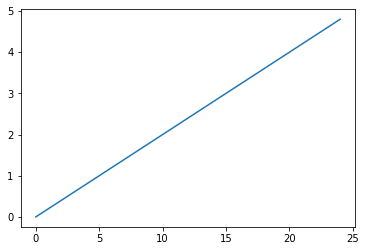

In [4]:
plt.plot(t)

<AxesSubplot:>

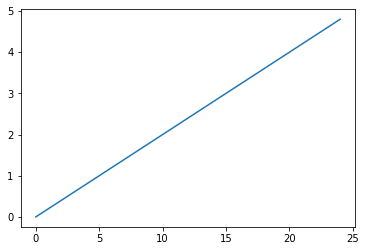

In [5]:
sns.lineplot(data=t)

### A basic plot with x + y

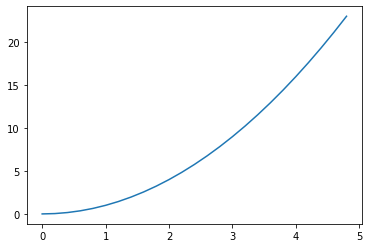

In [6]:
plt.plot(t, t**2)

c:\Users\mjt5v\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

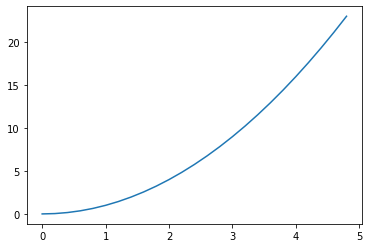

In [7]:
sns.lineplot(t, t**2)

## Styling the plot

See: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html and https://seaborn.pydata.org/generated/seaborn.lineplot.html for more details

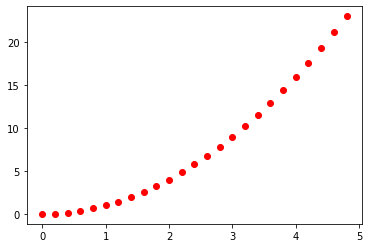

In [8]:
plt.plot(t, t**2, 'ro')

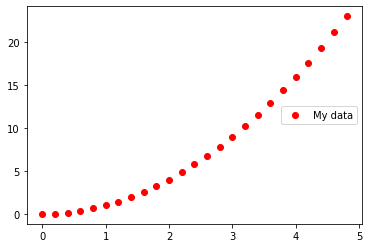

In [9]:
plt.scatter(t, t**2, color='#ff0000', label='My data')
plt.legend(loc='right')

c:\Users\mjt5v\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

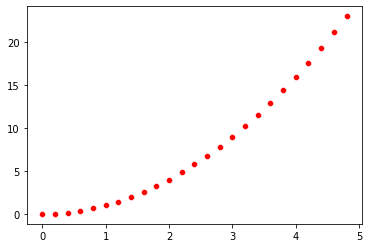

In [10]:
sns.scatterplot(t, t**2, color='r')

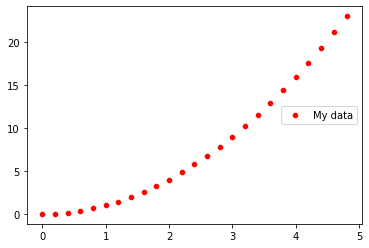

In [11]:
ax = sns.scatterplot(x=t, y=t**2, color='r', label='My data')
ax.legend(loc='right')

# Plotting multiple graphs on one figure

## The short way

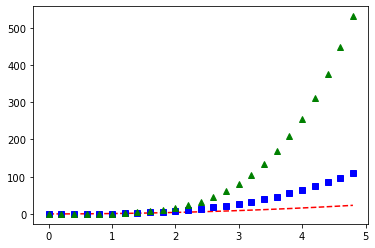

In [12]:
plt.plot(t, t**2, 'r--')
plt.plot(t, t**3, 'bs')
plt.plot(t, t**4, 'g^')

<AxesSubplot:>

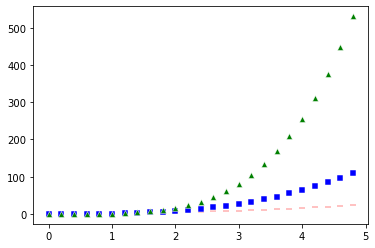

In [13]:
sns.scatterplot(x=t, y=t**2, color='r', marker='_')
sns.scatterplot(x=t, y=t**3, color='b', marker='s')
sns.scatterplot(x=t, y=t**4, color='g', marker='^')

## The long way...with styling

Text(0, 0.5, 'Y Label')

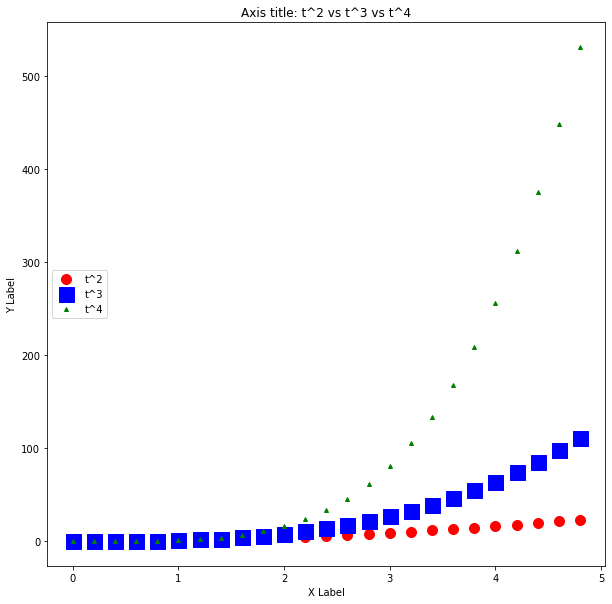

In [14]:
from matplotlib.pyplot import xlabel


fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.plot(t, t**2, 'ro', label='t^2', markersize=10)
ax.plot(t, t**3, 'bs', label='t^3', markersize=15)
ax.plot(t, t**4, 'g^', label='t^4', markersize=4)
ax.set_title('Axis title: t^2 vs t^3 vs t^4')
ax.legend(loc='center left')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

### More styling options with colormap and other params

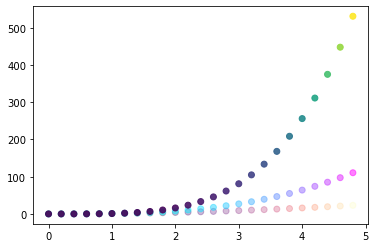

In [15]:
plt.scatter(x=t, y=t**2, c=t**2, alpha=0.3, cmap='magma')
plt.scatter(x=t, y=t**3, c=t**3, alpha=0.5, cmap='cool')
plt.scatter(x=t, y=t**4, c=t**4, alpha=0.9, cmap='viridis')

#### Colormaps in matplotlib: https://matplotlib.org/stable/tutorials/colors/colormaps.html#sequential

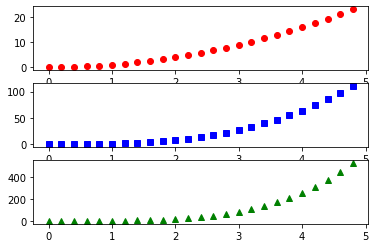

In [16]:
fig, ax = plt.subplots(3)
ax[0].plot(t, t**2, 'ro')
ax[1].plot(t, t**3, 'bs')
ax[2].plot(t, t**4, 'g^')

<AxesSubplot:>

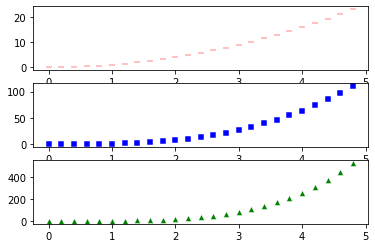

In [17]:
fig, ax = plt.subplots(3)
sns.scatterplot(x=t, y=t**2, color='r', marker='_', ax=ax[0])
sns.scatterplot(x=t, y=t**3, color='b', marker='s', ax=ax[1])
sns.scatterplot(x=t, y=t**4, color='g', marker='^', ax=ax[2])

# Other graphs

## Error bars

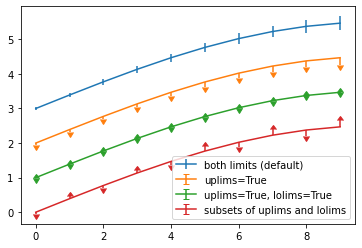

In [18]:

fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')

In [19]:
import pandas as pd

df = pd.DataFrame(data={'x': x, 'y': y, 'y1': y + 1, 'y2': y + 2, 'y3': y + 3}).set_index('x')
df

,y,y1,y2,y3
x,,,,
0,0.000000,1.000000,2.000000,3.000000
1,0.391086,1.391086,2.391086,3.391086
2,0.772542,1.772542,2.772542,3.772542
3,1.134976,2.134976,3.134976,4.134976
4,1.469463,2.469463,3.469463,4.469463
5,1.767767,2.767767,3.767767,4.767767
6,2.022542,3.022542,4.022542,5.022542
7,2.227516,3.227516,4.227516,5.227516
8,2.377641,3.377641,4.377641,5.377641


<ErrorbarContainer object of 3 artists>

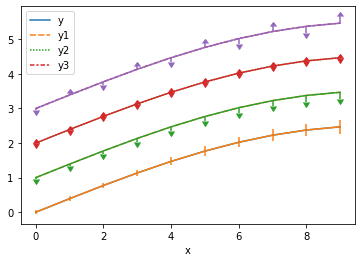

In [20]:
ax = sns.lineplot(data=df)
ax.errorbar(x=df.index, y=df['y'], yerr=yerr)
ax.errorbar(x=df.index, y=df['y1'], yerr=yerr, uplims=True)
ax.errorbar(x=df.index, y=df['y2'], yerr=yerr, uplims=True, lolims=True)
ax.errorbar(x=df.index, y=df['y3'], yerr=yerr, uplims=upperlimits, lolims=lowerlimits)

## Histogram

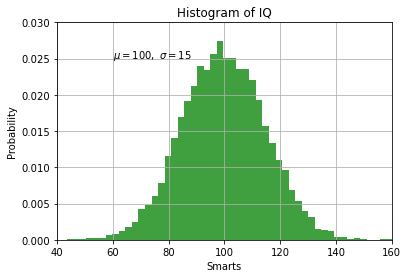

In [21]:
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

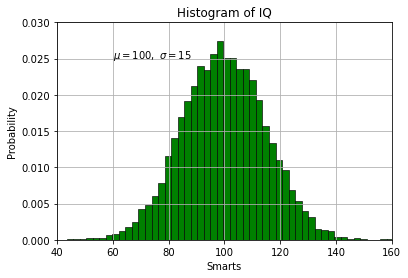

In [22]:
sns.histplot(x, stat='density', bins=50, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

<AxesSubplot:ylabel='Density'>

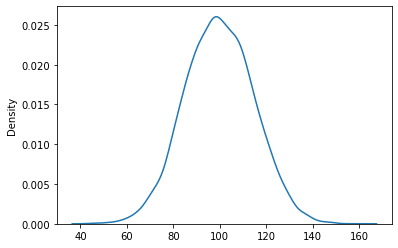

In [23]:
sns.kdeplot(x)

## Hist2d

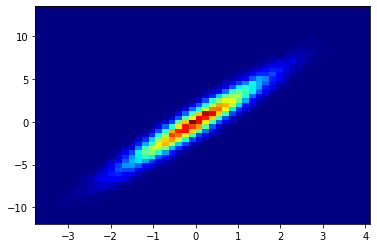

In [24]:
# create data
x = np.random.normal(size=50000)
y = x * 3 + np.random.normal(size=50000)
 
# Big bins
plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)
plt.show()

## Heatmap

In [29]:
# Create a dataset
df = pd.DataFrame(np.random.random((5,5)), columns=["a","b","c","d","e"])
df.corr()

,a,b,c,d,e
a,1.000000,0.406522,0.608903,0.228976,-0.215217
b,0.406522,1.000000,0.373450,0.148001,0.216617
c,0.608903,0.373450,1.000000,-0.512235,0.030797
d,0.228976,0.148001,-0.512235,1.000000,0.280071
e,-0.215217,0.216617,0.030797,0.280071,1.000000


<AxesSubplot:>

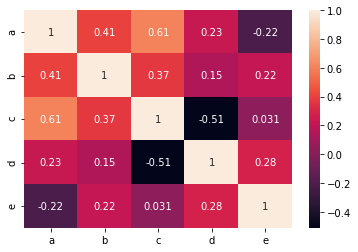

In [31]:
# Default heatmap
sns.heatmap(df.corr(), annot=True)

## Correlogram

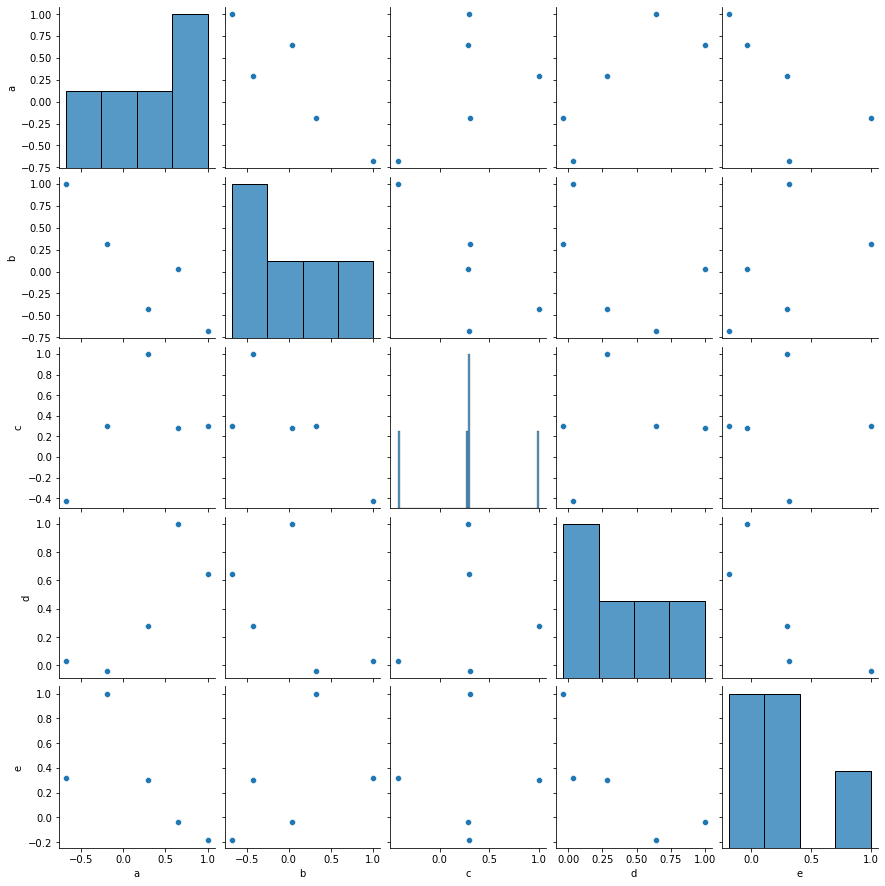

In [28]:
sns.pairplot(df.corr())

## Box plot

<AxesSubplot:>

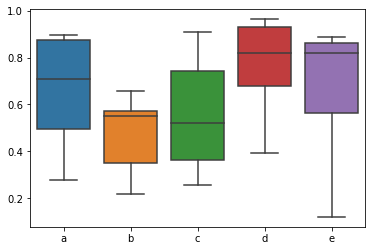

In [27]:
sns.boxplot(data=df)